In [11]:
library(tidyverse)
library(ISLR2)
library(survival)
library(survminer)
library(ggfortify)

In [12]:
?BrainCancer

BrainCancer {ISLR2},R Documentation


In [19]:
attach(BrainCancer)

In [20]:
names(BrainCancer)

[1] "sex"       "diagnosis" "loc"       "ki"        "gtv"       "stereo"   
[7] "status"    "time"

In [21]:
glimpse(BrainCancer)

Rows: 88
Columns: 8
$ sex       <fct> Female, Male, Female, Female, Male, Female, Male, Male, Fema…
$ diagnosis <fct> Meningioma, HG glioma, Meningioma, LG glioma, HG glioma, Men…
$ loc       <fct> Infratentorial, Supratentorial, Infratentorial, Supratentori…
$ ki        <int> 90, 90, 70, 80, 90, 80, 80, 80, 70, 100, 80, 90, 90, 90, 60,…
$ gtv       <dbl> 6.11, 19.35, 7.95, 7.61, 5.06, 4.82, 3.19, 12.37, 12.16, 2.5…
$ stereo    <fct> SRS, SRT, SRS, SRT, SRT, SRS, SRT, SRT, SRT, SRT, SRT, SRS, …
$ status    <int> 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, …
$ time      <dbl> 57.64, 8.98, 26.46, 47.80, 6.30, 52.75, 55.80, 42.10, 34.66,…


In [22]:
table(BrainCancer$sex)


Female   Male 
    45     43 

In [23]:
table(BrainCancer$diagnosis)


Meningioma  LG glioma  HG glioma      Other 
        42          9         22         14 

In [24]:
table(BrainCancer$status)


 0  1 
53 35 

##### 
* convention status = 1 indicates an uncensored observation, and status = 0 indicates a censored observation. But some scientists might use the opposite coding. For the BrainCancer data set 35 patients died before the end of the study.


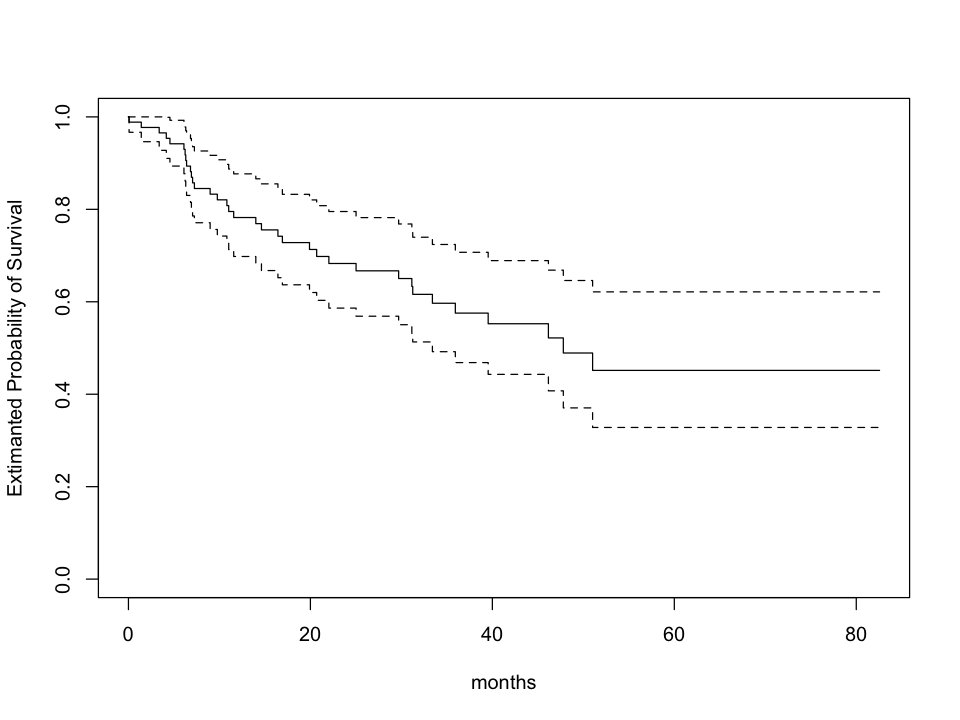

In [25]:
#  fit a survival curve without any covariates standard error bands (dashed curves)
fit.surv <- survfit(Surv(time, status) ~ 1)
plot(fit.surv, 
     xlab = "months",
    ylab = "Extimanted Probability of Survival")

### different way to make KM Curve

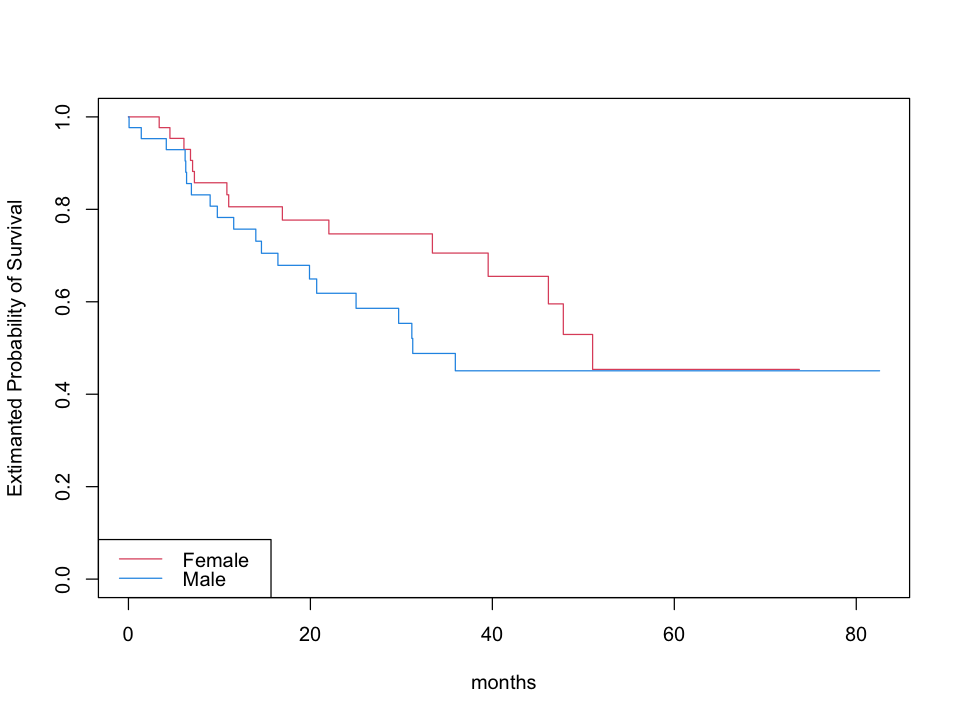

In [26]:
#  fit a survival curve with sex covariate 
fit.surv <- survfit(Surv(time, status) ~ sex, data = BrainCancer)
plot(fit.surv, 
     xlab = "months",
    ylab = "Extimanted Probability of Survival",  col = c(2,4))
legend("bottomleft", levels(sex), col = c(2,4), lty = 1)

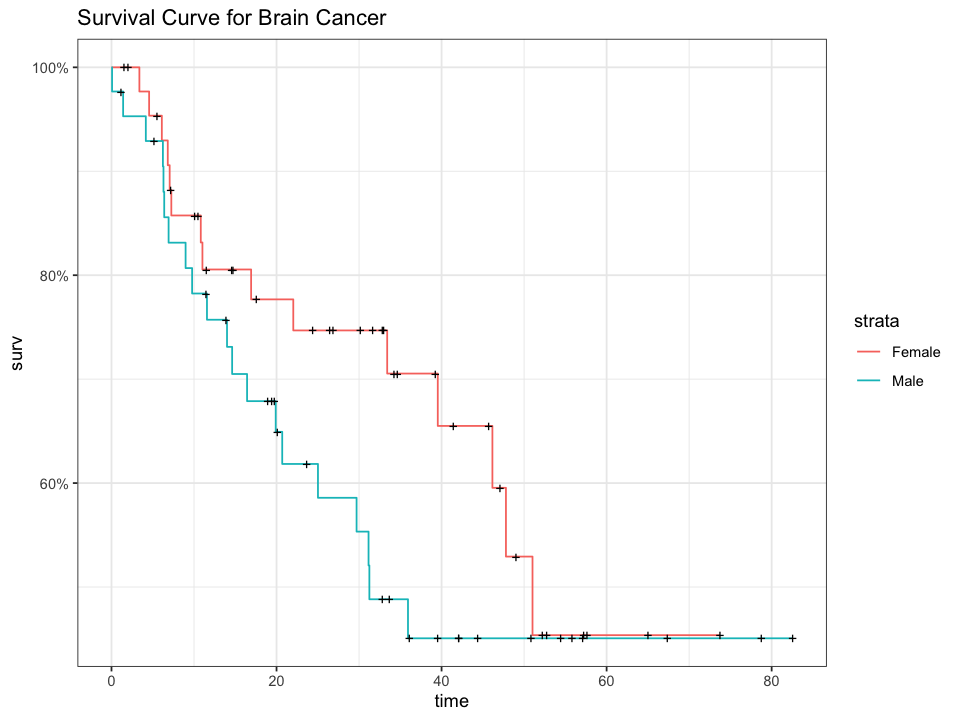

In [27]:
options(repr.plot.width = 8, repr.plot.height = 6)
autoplot(fit.surv, conf.int = FALSE) + 
labs(title = 'Survival Curve for Brain Cancer') + 
theme_bw() 

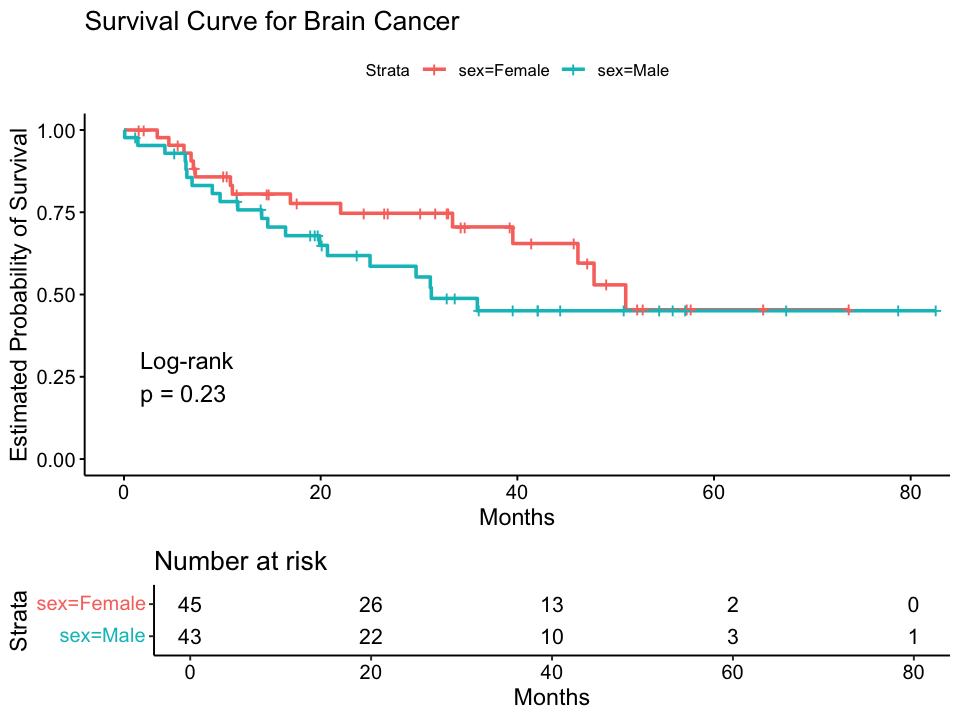

In [28]:
options(repr.plot.width = 8, repr.plot.height = 6)
ggsurvplot(fit.surv, data = BrainCancer, 
           xlab = "Months", 
           ylab = "Estimated Probability of Survival",
           title = "Survival Curve for Brain Cancer",
          pval = TRUE,
           pval.method = TRUE,
          risk.table = TRUE
          )

In [29]:
summary(fit.surv)$table

,records,n.max,n.start,events,rmean,se(rmean),median,0.95LCL,0.95UCL
sex=Female,45,45,45,15,53.15313,5.645267,51.02,46.16,NA
sex=Male,43,43,43,20,46.28717,5.656114,31.25,20.69,NA


* **Median survival time** is the time at which 50% of the subjects in a study have experienced the event.
* At 51 month, half of the females experienced the event.
* At 31 months, half of the male experienced the event. 

#### Survival probability at different time points and its CI

In [30]:
summary(fit.surv, times=c(15, 30, 45, 60, 75, 90))

Call: survfit(formula = Surv(time, status) ~ sex, data = BrainCancer)

                sex=Female 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   15     28       8    0.806  0.0619        0.693        0.937
   30     22       2    0.747  0.0699        0.622        0.897
   45     12       2    0.655  0.0867        0.505        0.849
   60      2       3    0.454  0.1151        0.276        0.746

                sex=Male 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   15     27      12    0.705  0.0718        0.577        0.861
   30     17       5    0.553  0.0827        0.413        0.742
   45      7       3    0.451  0.0862        0.310        0.656
   60      3       0    0.451  0.0862        0.310        0.656
   75      2       0    0.451  0.0862        0.310        0.656


### log-rank test to compare the survival of males to females
* log rank test is analogous to t-test 

In [31]:
logrank.test <- survdiff(Surv(time, status) ~ sex, data = BrainCancer)
logrank.test

Call:
survdiff(formula = Surv(time, status) ~ sex, data = BrainCancer)

            N Observed Expected (O-E)^2/E (O-E)^2/V
sex=Female 45       15     18.5     0.676      1.44
sex=Male   43       20     16.5     0.761      1.44

 Chisq= 1.4  on 1 degrees of freedom, p= 0.2 

### 
* 𝑝-value is 0.2 indicating no evidence of a difference in survival between the two sexes.

### Cox proportional hazards models 

#### Univariate

In [32]:
# using sex as predictor 
fit.cox <- coxph(Surv(time, status) ~ sex, data = BrainCancer)
summary(fit.cox)

Call:
coxph(formula = Surv(time, status) ~ sex, data = BrainCancer)

  n= 88, number of events= 35 

          coef exp(coef) se(coef)     z Pr(>|z|)
sexMale 0.4077    1.5033   0.3420 1.192    0.233

        exp(coef) exp(-coef) lower .95 upper .95
sexMale     1.503     0.6652     0.769     2.939

Concordance= 0.565  (se = 0.045 )
Likelihood ratio test= 1.44  on 1 df,   p=0.2
Wald test            = 1.42  on 1 df,   p=0.2
Score (logrank) test = 1.44  on 1 df,   p=0.2


#### Multivariate

In [33]:
fit.all <- coxph(
Surv(time, status) ~ sex + diagnosis + loc + ki + gtv +
   stereo)
fit.all

Call:
coxph(formula = Surv(time, status) ~ sex + diagnosis + loc + 
    ki + gtv + stereo)

                       coef exp(coef) se(coef)      z        p
sexMale             0.18375   1.20171  0.36036  0.510  0.61012
diagnosisLG glioma  0.91502   2.49683  0.63816  1.434  0.15161
diagnosisHG glioma  2.15457   8.62414  0.45052  4.782 1.73e-06
diagnosisOther      0.88570   2.42467  0.65787  1.346  0.17821
locSupratentorial   0.44119   1.55456  0.70367  0.627  0.53066
ki                 -0.05496   0.94653  0.01831 -3.001  0.00269
gtv                 0.03429   1.03489  0.02233  1.536  0.12466
stereoSRT           0.17778   1.19456  0.60158  0.296  0.76760

Likelihood ratio test=41.37  on 8 df, p=1.776e-06
n= 87, number of events= 35 
   (1 observation deleted due to missingness)

### Interpreting the Cox Proportional Hazards Model Output

* It is used to estimate the effect of predictor variables on survival time. 
* It models the **hazard ratio (HR)**, which represents the relative risk of an event (e.g., death) occurring for one group compared to another.

---

* coef (Coefficient): Represents the log hazard ratio (log(HR)).
* exp(coef) (Hazard Ratio, HR): The effect size—how the risk of death changes for each variable.
* HR > 1 → Increased risk.
* HR < 1 → Decreased risk (protective factor).
* negative HR is good (protective)

---

####  Interpretation of Variables

| **Variable**           | **HR (exp(coef))** | **Interpretation** | **p-value** | **Significance** |
|------------------------|------------------|-------------------|------------|----------------|
| **sexMale**            | 1.2017  | Males have **20% higher** risk of death than females, but **not significant**.  | 0.61012 |  No |
| **diagnosisLG glioma** | 2.4968  | **Low-grade glioma** has **2.5x higher risk** compared to the baseline category (meningioma). | 0.15161 |  No |
| **diagnosisHG glioma** | 8.6241  | **High-grade glioma patients have 8.6x higher risk** of death (**strongly significant**). | **1.73e-06** |  **Yes** |
| **diagnosisOther**     | 2.4247  | Other types of brain cancer have **2.4x higher risk** than the baseline. | 0.17821 |  No |
| **locSupratentorial**  | 1.5546  | Tumor in the **supratentorial region** increases risk, but **not significant**. | 0.53066 |  No |
| **ki (Karnofsky Index)** | 0.9465  | **Each unit increase in Karnofsky Index reduces risk by ~5%** (HR < 1, protective effect). | **0.00269** |  **Yes** |
| **gtv (Gross Tumor Volume)** | 1.0349  | Larger tumor volume slightly increases risk (not significant). | 0.12466 |  No |
| **stereoSRT** | 1.1946 | Stereotactic radiotherapy has little impact (not significant). | 0.76760 |  No |

---

6. **Concordance Index (`Concordance = 0.565`)**:  
   - Measures how well the model discriminates between individuals at higher vs. lower risk.  
   - **0.5** = No predictive power, **1.0** = Perfect prediction.  
   - **0.565** is slightly better than random guessing but weak.

---

### Publication Data

In [34]:
?Publication

Publication {ISLR2},R Documentation


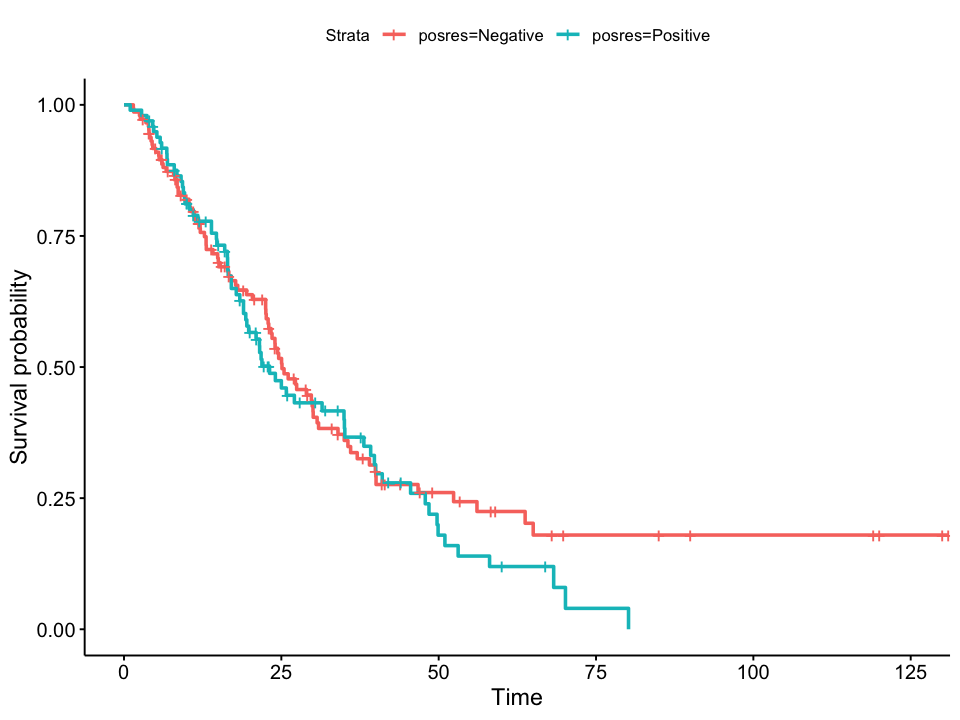

In [35]:
Publication$posres <- factor(Publication$posres, levels = c(0,1), labels = c("Negative", "Positive"))
fit.posres <- survfit(
    Surv(time, status) ~ posres, data = Publication
  )
ggsurvplot(fit.posres)

# 1 positive results 
# 2 negative results

In [36]:
# cox proportional hazard model
fit.pub <- coxph(Surv(time, status) ~ posres,
    data = Publication)
fit.pub

Call:
coxph(formula = Surv(time, status) ~ posres, data = Publication)

                 coef exp(coef) se(coef)     z    p
posresPositive 0.1481    1.1596   0.1616 0.916 0.36

Likelihood ratio test=0.83  on 1 df, p=0.3611
n= 244, number of events= 156 

In [37]:
logrank.test <- survdiff(Surv(time, status) ~ posres,
    data = Publication)
logrank.test

Call:
survdiff(formula = Surv(time, status) ~ posres, data = Publication)

                  N Observed Expected (O-E)^2/E (O-E)^2/V
posres=Negative 146       87     92.6     0.341     0.844
posres=Positive  98       69     63.4     0.498     0.844

 Chisq= 0.8  on 1 degrees of freedom, p= 0.4 

In [38]:
fit.pub2 <- coxph(Surv(time, status) ~ . - mech,
    data = Publication)
fit.pub2

Call:
coxph(formula = Surv(time, status) ~ . - mech, data = Publication)

                     coef  exp(coef)   se(coef)      z       p
posresPositive  5.708e-01  1.770e+00  1.760e-01  3.244 0.00118
multi          -4.086e-02  9.600e-01  2.512e-01 -0.163 0.87079
clinend         5.462e-01  1.727e+00  2.620e-01  2.085 0.03710
sampsize        4.678e-06  1.000e+00  1.472e-05  0.318 0.75070
budget          4.385e-03  1.004e+00  2.465e-03  1.779 0.07518
impact          5.832e-02  1.060e+00  6.676e-03  8.735 < 2e-16

Likelihood ratio test=149.2  on 6 df, p=< 2.2e-16
n= 244, number of events= 156 